C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


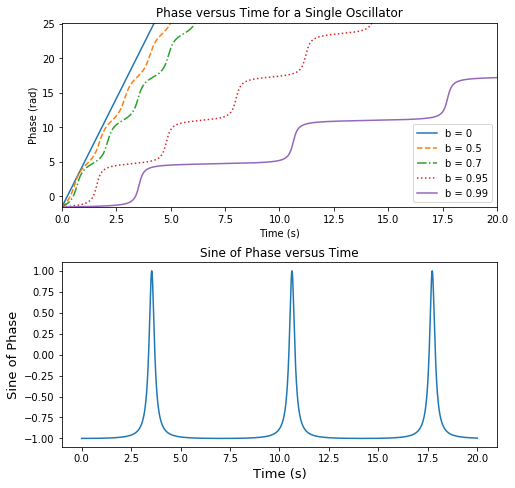

In [2]:
### FIGURE 1

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

## Plot the equation phi(t) (eq. 2) for various values of break

### DEFINE FUNCTION
def phi_t(b,omega,t):
    beta = np.sqrt(1-b**2)
    C = (-2)/beta * np.arctan( (b-1)/beta )
    phi_t = 2*np.arctan(
        beta*np.tan( (omega*t-C)*(.5*beta) ) - b 
        )
    return phi_t

### GENERATE TIME SAMPLING
ts = np.linspace(0, 20, 5000)     

### INSTANTIATE SIMULATION PARAMETERS
bs = [0,.5,.7,.95,.99]
omega = 2*np.pi

### GENERATE DATA & PLOT FOR EACH B value
lines = ["-","--","-.",":","-"]
linecycler = cycle(lines)

plt.subplot(211)
for b in bs:
    result = np.unwrap(phi_t(b, omega, ts))
    plt.plot(ts,result,next(linecycler),label='b = '+str(b))
    

    if b==.99:
        plt.subplot(212)
        plt.plot(ts,np.sin(result),next(linecycler),label='b = '+str(b))

plt.subplot(211)
plt.legend()
plt.ylim([-np.pi/2,8*np.pi])
plt.xlim([0,np.max(ts)])
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')
plt.title('Phase versus Time for a Single Oscillator')

plt.subplot(212)
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Sine of Phase',fontsize=13)
plt.title('Sine of Phase versus Time')

fig = plt.gcf()
fig.subplots_adjust(hspace=.3)
fig.set_size_inches(7.8, 7.8)
plt.show()
fig.savefig('Fig1.eps', dpi=100)


In [58]:
### FIGURE 2
##Simulate 100 globally coupled active rotators where 
#omega = 12pi, initial phases are about 3*pi/2,  K = 1

def phi_dot(omega,b,phi,K):
    ## Caclulate the derivative given the vectors of phi and omega, values b & K
    N = np.size(phi)
    cc = 1/N * np.sum( np.exp(1j* phi)   )  # complex coherence
    dphi = omega*(1+b*np.sin(phi)) + K*np.absolute(cc)*np.sin(np.angle(cc)-phi)
    return [dphi, np.absolute(cc), np.angle(cc)]
  

### Simulation Setup
N     = 50       # Number of Oscillators
Omega = 12*np.pi  # Natural Frequency of Oscillators (average)
SNR   = 70        # Signal to Noise Ratio (in dB)
T     = 10
dt    = .0001     # TimeStep
K     = 1       # Coupling Strength
b     = .99
omega = [Omega]*N

### Initialization
ts = np.arange(0, T, dt)
ts = np.reshape(ts,newshape=(1,np.size(ts)))
phases = np.zeros((N,np.size(ts)))
phases[:,0] = np.random.normal(loc=1.5*np.pi,scale=1,size=(N))
rs     = np.zeros((np.size(ts)))  #Coherence Vector
stabs  = np.zeros((np.size(ts)))  #Stability Vector

### Run the Simulation
for idx in range(0,np.size(ts)-1):
    [dphi_dt, rs[idx+1], psi] = phi_dot(omega,b,phases[:,idx],K)
    phases[:,idx+1] = dphi_dt*dt + phases[:,idx]  
    stabs[idx+1]    = Omega*b*np.cos(psi)-K*rs[idx]
    
# Normalize Stability:
stabs_norm = stabs/np.max(stabs)
ts = np.squeeze(ts)



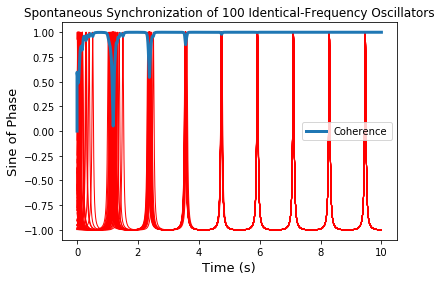

In [59]:
## Plotting
plt.plot(ts,np.transpose(np.sin(phases)),c='red',linewidth=1.0)
plt.plot(ts,np.transpose(rs),label='Coherence',linewidth=3.0)
plt.legend()
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('Sine of Phase',fontsize=13)
plt.title('Spontaneous Synchronization of 100 Identical-Frequency Oscillators')

fig = plt.gcf()
plt.show()
fig.savefig('Fig2.eps', dpi=100)

In [70]:
### FIGURE 3 
##Simulate 250 globally coupled active rotators where 
#omega = 12pi, initial phases are about 3*pi/2,  K = 1
#the standard deviation is .05*omega

def phi_dot(omega,b,phi,K):
    ## Caclulate the derivative given the vectors of phi and omega, values b & K
    N = np.size(phi)
    cc = 1/N * np.sum( np.exp(1j* phi)   )  # complex coherence
    dphi = omega*(1+b*np.sin(phi)) + K*np.absolute(cc)*np.sin(np.angle(cc)-phi)
    return [dphi, np.absolute(cc), np.angle(cc)]
  

### Simulation Setup
N     = 50       # Number of Oscillators
Omega = 12*np.pi  # Natural Frequency of Oscillators (average)
SNR   = 70        # Signal to Noise Ratio (in dB)
T     = 10
dt    = .0001     # TimeStep
K     = 1       # Coupling Strength
b     = .99
omega = np.random.normal(loc=Omega,scale=.04*omega,size=(N))

### Initialization
ts = np.arange(0, T, dt)
ts = np.reshape(ts,newshape=(1,np.size(ts)))
phases = np.zeros((N,np.size(ts)))
phases[:,0] = np.random.normal(loc=1.5*np.pi,scale=2*np.pi,size=(N))
rs     = np.zeros((np.size(ts)))  #Coherence Vector
stabs  = np.zeros((np.size(ts)))  #Stability Vector

### Run the Simulation
for idx in range(0,np.size(ts)-1):
    [dphi_dt, rs[idx+1], psi] = phi_dot(omega,b,phases[:,idx],K)
    phases[:,idx+1] = dphi_dt*dt + phases[:,idx]  
    stabs[idx+1]    = Omega*b*np.cos(psi)-K*rs[idx]
    
# Normalize Stability:
stabs_norm = stabs/np.max(stabs)

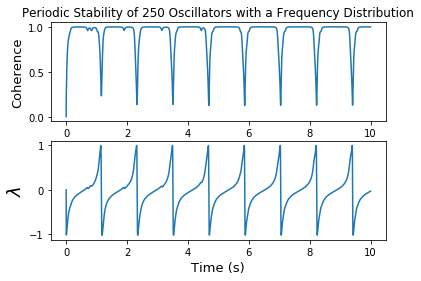

In [73]:
### Plotting
# plt.plot(np.transpose(ts),np.transpose(np.sin(phases)))
# plt.xlabel('Time (s)')
# plt.ylabel('Sine of Phase')
# plt.show()

plt.subplot(211)
plt.plot(np.transpose(ts),np.transpose(rs))
# scat = plt.scatter(ts,rs,c=stabs_norm,cmap='hot',s=.5)
plt.xlabel('Time (s)')
plt.ylabel('Coherence',fontsize=13)
# cb = plt.colorbar(scat,orientation="horizontal")
# cb.set_label('Stability')
plt.title('Periodic Stability of 250 Oscillators with a Frequency Distribution')

plt.subplot(212)
plt.plot(np.transpose(ts),np.transpose(stabs_norm))
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('$\lambda$',fontsize=18)

fig = plt.gcf()
plt.show()
fig.savefig('Fig3_2.eps', dpi=100)


In [67]:
### FIGURE 3, EXCEPT NOISE DRIVEN
##Simulate 250 globally coupled active rotators where 
#omega = 12pi, initial phases are about 3*pi/2,  K = 1
#the standard deviation is .05*omega

def phi_dot(omega,b,phi,K):
    ## Caclulate the derivative given the vectors of phi and omega, values b & K
    N = np.size(phi)
    cc = 1/N * np.sum( np.exp(1j* phi)   )  # complex coherence
    dphi = omega*(1+b*np.sin(phi)) + K*np.absolute(cc)*np.sin(np.angle(cc)-phi)
    dphi += np.random.normal(0,scale=np.pi,size=(N))
    return [dphi, np.absolute(cc), np.angle(cc)]
  

### Simulation Setup
N     = 50       # Number of Oscillators
Omega = 12*np.pi  # Natural Frequency of Oscillators (average)
SNR   = 70        # Signal to Noise Ratio (in dB)
T     = 10
dt    = .0001     # TimeStep
K     = 1       # Coupling Strength
b     = .99
omega = Omega
### Initialization
ts = np.arange(0, T, dt)
ts = np.reshape(ts,newshape=(1,np.size(ts)))
phases = np.zeros((N,np.size(ts)))
phases[:,0] = np.random.normal(loc=1.5*np.pi,scale=2*np.pi,size=(N))
rs     = np.zeros((np.size(ts)))  #Coherence Vector
stabs  = np.zeros((np.size(ts)))  #Stability Vector

### Run the Simulation
for idx in range(0,np.size(ts)-1):
    [dphi_dt, rs[idx+1], psi] = phi_dot(omega,b,phases[:,idx],K)
    phases[:,idx+1] = dphi_dt*dt + phases[:,idx] 
    stabs[idx+1]    = Omega*b*np.cos(psi)-K*rs[idx]
    
# Normalize Stability:
stabs_norm = stabs/np.max(stabs)

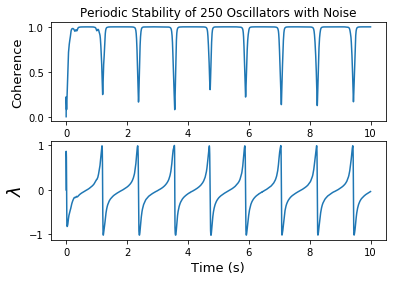

In [69]:
### Plotting
# plt.plot(np.transpose(ts),np.transpose(np.sin(phases)))
# plt.xlabel('Time (s)')
# plt.ylabel('Sine of Phase')
# plt.show()

plt.subplot(211)
plt.plot(np.transpose(ts),np.transpose(rs))
# scat = plt.scatter(ts,rs,c=stabs_norm,cmap='hot',s=.5)
plt.xlabel('Time (s)')
plt.ylabel('Coherence',fontsize=13)
# cb = plt.colorbar(scat,orientation="horizontal")
# cb.set_label('Stability')
plt.title('Periodic Stability of 250 Oscillators with Noise')

plt.subplot(212)
plt.plot(np.transpose(ts),np.transpose(stabs_norm))
plt.xlabel('Time (s)',fontsize=13)
plt.ylabel('$\lambda$',fontsize=18)

fig = plt.gcf()
plt.show()
fig.savefig('Fig3_1.eps', dpi=100)


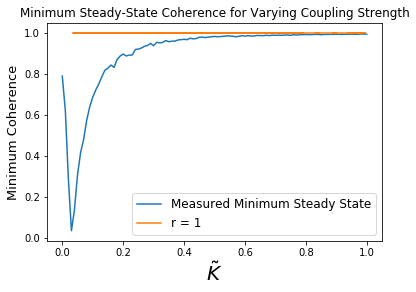

In [8]:
### FIGURE 4  


name_list = [str(i) for i in range(0,100)]
data = np.genfromtxt("C:\\Users\\fritz\Desktop\\Git Repos\\workspace\\Active Rotator Paper Code\\Min_R_vs_K.csv", delimiter=',',
                    names=['K', 'min_rs'])

plt.plot(data['K'],data['min_rs'])
plt.plot(data['min_rs'],[1]*np.size(data['min_rs']))
plt.xlabel(r'$\tilde{K}$',fontsize=20)
plt.ylabel('Minimum Coherence',fontsize=13)
plt.title('Minimum Steady-State Coherence for Varying Coupling Strength')
plt.legend(['Measured Minimum Steady State','r = 1'],fontsize= 12)

fig = plt.gcf()
plt.show()
fig.savefig('Fig4.eps', dpi=100)


In [7]:
### FIGURE 5
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg


name_list = [str(i) for i in range(0,100)]
data = np.genfromtxt("C:\\Users\\fritz\Desktop\\Git Repos\\workspace\\Active Rotator Paper Code\\Neural_Trace_and_phase.csv", delimiter=',',
                    names=['ts', 'voltage','phases'])

In [5]:
print(np.shape(data))

(19002,)


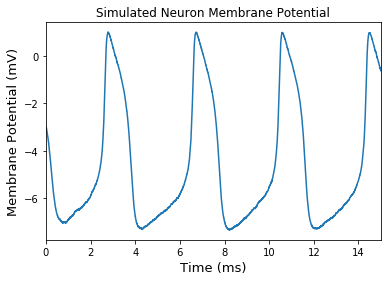

In [11]:
plt.plot(data['ts'],data['voltage'])
plt.xlabel('Time (ms)',fontsize=13)
plt.ylabel('Membrane Potential (mV)',fontsize=13)
plt.xlim([0, 15])
plt.title('Simulated Neuron Membrane Potential')

fig = plt.gcf()
plt.show()
fig.savefig('Fig5_1.eps', dpi=100)



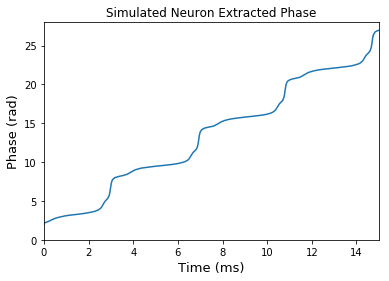

In [16]:
plt.plot(data['ts'],np.unwrap(data['phases']))
plt.xlabel('Time (ms)',fontsize=13)
plt.ylabel('Phase (rad)',fontsize=13)
plt.xlim([0, 15])
plt.ylim([0, 28])
plt.title('Simulated Neuron Extracted Phase')

fig = plt.gcf()
plt.show()
fig.savefig('Fig5_2.eps', dpi=100)

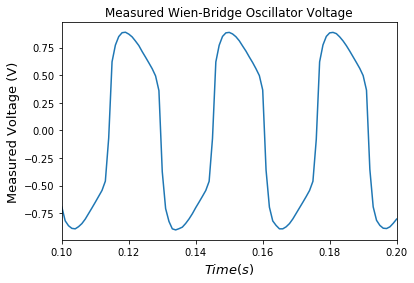

In [10]:
### FIGURE 6
name_list = [str(i) for i in range(0,100)]
data = np.genfromtxt("C:\\Users\\fritz\Desktop\\Git Repos\\workspace\\Active Rotator Paper Code\\Wein_Bridge_Data.csv", delimiter=',',
                    names=['ts', 'vs','phases'])

plt.plot(data['ts'],data['vs'])
plt.xlabel('$Time(s)$',fontsize=13)
plt.ylabel('Measured Voltage (V)',fontsize=13)
plt.title('Measured Wien-Bridge Oscillator Voltage')
plt.xlim([.1, .2])

fig = plt.gcf()
plt.show()
fig.savefig('Fig6_1.eps', dpi=100)

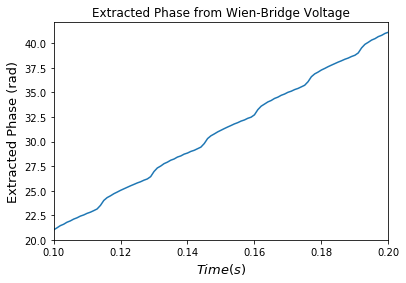

In [11]:
plt.plot(data['ts'],data['phases'])
plt.xlabel('$Time(s)$',fontsize=13)
plt.ylabel('Extracted Phase (rad)',fontsize=13)
plt.title('Extracted Phase from Wien-Bridge Voltage')
plt.xlim([.1, .2])

fig = plt.gcf()
plt.show()
fig.savefig('Fig6_2.eps', dpi=100)

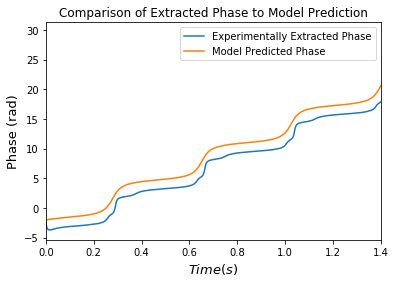

In [5]:
### FIGURE 7
name_list = [str(i) for i in range(0,100)]
data = np.genfromtxt("C:\\Users\\fritz\Desktop\\Git Repos\\workspace\\Active Rotator Paper Code\\Neural_Comparison_Data.csv", delimiter=',',
                    names=['ts', 'extract','calc'])

plt.plot(data['ts'],data['extract'],label='Experimentally Extracted Phase')
plt.plot(data['ts'],data['calc'],label='Model Predicted Phase')
plt.xlabel('$Time(s)$',fontsize=13)
plt.ylabel('Phase (rad)',fontsize=13)
plt.title('Comparison of Extracted Phase to Model Prediction')
plt.xlim([0, 1.4])
plt.legend()


fig = plt.gcf()
plt.show()
fig.savefig('Fig7.eps', dpi=100)

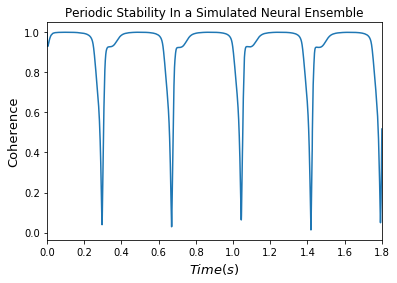

In [6]:
### FIGURE 
name_list = [str(i) for i in range(0,100)]
data = np.genfromtxt("C:\\Users\\fritz\Desktop\\Git Repos\\workspace\\Active Rotator Paper Code\\Neural_Periodic_Stability.csv", delimiter=',',
                    names=['ts', 'rs'])

plt.plot(data['ts'],data['rs'])
plt.xlabel('$Time(s)$',fontsize=13)
plt.ylabel('Coherence',fontsize=13)
plt.title('Periodic Stability In a Simulated Neural Ensemble')
plt.xlim([0, 1.8])

fig = plt.gcf()
plt.show()
fig.savefig('Fig8.eps', dpi=100)